# **Sentiment Analysis**

This note is to train 10000 samples using NLTK and Sklearn ML libraries and demonstrate how to build the sentiment model to identify whether the individual article is positive or negative.

In [1]:
import nltk
import random
import string
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [44]:
punctuations = set(string.punctuation)

In [40]:
stop_words = set(stopwords.words('English'))

In [55]:
ps = PorterStemmer()

In [191]:
pos_doc = open('positive.txt','rb')
neg_doc = open('negative.txt','rb')
documents = []
for review in pos_doc:
    documents.append((review.decode('latin-1').rstrip(), 1))

for review in neg_doc:
    documents.append((review.decode('latin-1').rstrip(), 0))
    
random.shuffle(documents)

print (documents[:5])


[('the whole thing plays out with the drowsy heaviness of synchronized swimmer wearing a wool wetsuit .', 0), (' . . . with " the bourne identity " we return to the more traditional action genre .', 1), ('there ought to be a directing license , so that ed burns can have his revoked .', 0), ('what was subtle and mystifying in the novella is now broad and farcical .', 0), ("aside from being the funniest movie of the year , simone , andrew niccol's brilliant anti-hollywood satire , has a wickedly eccentric enchantment to it .", 1)]


## 1. Data preprocessing: normalizing, stemmed, removing stopwords and punctuations

In [172]:
all_corpus_words = []
for review, category in documents:
    words = [ps.stem(x.lower()) for x in nltk.word_tokenize(str(review))
                     if x not in stop_words if x not in punctuations if x != "''"]
    for word in words:
        all_corpus_words.append(word)

print (len(all_corpus_words))

118228


In [173]:
all_corpus_words = nltk.FreqDist(all_corpus_words)

In [174]:
print (len(all_corpus_words))

14752


In [187]:
all_corpus_words.most_common(10)

[("'s", 3537),
 ('film', 1804),
 ('movi', 1547),
 ("n't", 940),
 ('like', 804),
 ('one', 763),
 ('--', 670),
 ('``', 655),
 ('make', 611),
 ('stori', 536)]

In [176]:
word_features = [x for x,y in all_corpus_words.most_common(3000)]
print (len(word_features), word_features[:10])

3000 ["'s", 'film', 'movi', "n't", 'like', 'one', '--', '``', 'make', 'stori']


## 2. Simple bag-of-words model

### meaning features = 1/0, True/False

In [144]:
def get_features(review):
    features = {}
    review_words = set([x.lower() for x in nltk.word_tokenize(str(review)) 
                     if x not in stop_words if x not in punctuations])
    for word in word_features:
        features[word] = (word in review_words)
    return features

In [177]:
allData = []
for review, category in documents:
    allData.append((get_features(review), category))

In [146]:
print (len(allData))

10662


In [185]:
from sklearn.model_selection import train_test_split
trainData, testData = train_test_split(allData, test_size=0.33)

In [151]:
print (len(trainData), len(testData))

7143 3519


# 3. NLTK Naive Bayes classifier training and testing

In [179]:
classifier = nltk.NaiveBayesClassifier.train(trainData)
print ('Accuracy:', nltk.classify.accuracy(classifier, testData))

Accuracy: 0.6706450696220517


In [182]:
classifier = nltk.NaiveBayesClassifier.train(trainData)
print ('Accuracy:', nltk.classify.accuracy(classifier, testData))

Accuracy: 0.670076726342711


In [184]:
classifier = nltk.NaiveBayesClassifier.train(trainData)
print ('Accuracy:', nltk.classify.accuracy(classifier, testData))

Accuracy: 0.6609832338732594


In [186]:
classifier = nltk.NaiveBayesClassifier.train(trainData)
print ('Accuracy:', nltk.classify.accuracy(classifier, testData))

Accuracy: 0.6572890025575447


In [188]:
classifier.classify(get_features(documents[2][0]))

1

In [189]:
classifier.classify(get_features(documents[2][1]))

1

In [190]:
classifier.show_most_informative_features(15)

Most Informative Features
                    dull = True                0 : 1      =     19.7 : 1.0
                    loud = True                0 : 1      =     12.3 : 1.0
                      tv = True                0 : 1      =     11.8 : 1.0
                    flat = True                0 : 1      =     11.0 : 1.0
                      90 = True                0 : 1      =     10.3 : 1.0
                  warmth = True                1 : 0      =      9.7 : 1.0
                    weak = True                0 : 1      =      9.6 : 1.0
                    save = True                0 : 1      =      9.0 : 1.0
                   vivid = True                1 : 0      =      8.4 : 1.0
                mindless = True                0 : 1      =      8.3 : 1.0
                     low = True                0 : 1      =      8.3 : 1.0
                    warm = True                1 : 0      =      7.8 : 1.0
                  stupid = True                0 : 1      =      7.8 : 1.0

In [201]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

In [194]:
MNB_classifier = SklearnClassifier(MultinomialNB())
MNB_classifier.train(trainData)
print ('MNB Accuracy:', nltk.classify.accuracy(MNB_classifier, testData)) 

MNB Accuracy: 0.6606990622335891


In [196]:
BNB_classifier = SklearnClassifier(BernoulliNB())
BNB_classifier.train(trainData)
print ('BNB Accuracy:', nltk.classify.accuracy(BNB_classifier, testData)) 

BNB Accuracy: 0.6564364876385337


## Others

In [200]:
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [199]:
SVC_classifier = SklearnClassifier(SVC())
SVC_classifier.train(trainData)
print ('SVC Accuracy:', nltk.classify.accuracy(SVC_classifier, testData)) 

SVC Accuracy: 0.49843705598181304


In [202]:
LSVC_classifier = SklearnClassifier(LinearSVC())
LSVC_classifier.train(trainData)
print ('Linear SVC Accuracy:', nltk.classify.accuracy(LSVC_classifier, testData)) 

Linear SVC Accuracy: 0.6544472861608411


In [204]:
NuSVC_classifier = SklearnClassifier(NuSVC())
NuSVC_classifier.train(trainData)
print ('NU SVC Accuracy:', nltk.classify.accuracy(NuSVC_classifier, testData)) 

NU SVC Accuracy: 0.6337027564649048


In [205]:
LogReg_classifier = SklearnClassifier(LogisticRegression())
LogReg_classifier.train(trainData)
print ('Logsitic Regression Accuracy:', nltk.classify.accuracy(LogReg_classifier, testData)) 

Logsitic Regression Accuracy: 0.6652458084683148


In [210]:
SGD_classifier = SklearnClassifier(SGDClassifier())
SGD_classifier.train(trainData)
print ('SGD Regression Accuracy:', nltk.classify.accuracy(SGD_classifier, testData)) 

SGD Regression Accuracy: 0.6354077863029269


## Vote Classifer (majority)

In [206]:
from nltk.classify import ClassifierI
from statistics import mode

In [219]:
class VoteClassifier(ClassifierI):
    def __init__(self, *classifiers):
        self._classifiers = classifiers
        
    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        return mode(votes)
    
    def confidence(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)

        choice_votes = votes.count(mode(votes))
        conf = choice_votes / len(votes)
        return conf

In [220]:
voted_classifier = VoteClassifier(classifier, MNB_classifier, BNB_classifier, 
                                  SVC_classifier, LSVC_classifier, NuSVC_classifier,
                                 LogReg_classifier, SGD_classifier)

In [222]:
print ('voted classifier Accuracy:', nltk.classify.accuracy(voted_classifier, testData)) 

StatisticsError: no unique mode; found 2 equally common values

In [ ]:
print("Classification:", voted_classifier.classify(testData[0][0]), "Confidence %:",voted_classifier.confidence(testData[0][0]))
print("Classification:", voted_classifier.classify(testData[1][0]), "Confidence %:",voted_classifier.confidence(testData[1][0]))
print("Classification:", voted_classifier.classify(testData[2][0]), "Confidence %:",voted_classifier.confidence(testData[2][0]))
print("Classification:", voted_classifier.classify(testData[3][0]), "Confidence %:",voted_classifier.confidence(testData[3][0]))
print("Classification:", voted_classifier.classify(testData[4][0]), "Confidence %:",voted_classifier.confidence(testData[4][0]))
print("Classification:", voted_classifier.classify(testData[5][0]), "Confidence %:",voted_classifier.confidence(testData[5][0]))

# 4. Sklearn 

## TF-IDF representation

### tf-idf(w,d) = tf (w,d)×(idf(w,d)+1)

In [376]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(stop_words ='english')
bag = count.fit_transform([review for review, sent in documents])

In [369]:
documents[0], documents[2]

(('the whole thing plays out with the drowsy heaviness of synchronized swimmer wearing a wool wetsuit .',
  0),
 ('there ought to be a directing license , so that ed burns can have his revoked .',
  0))

In [380]:
a = [count.vocabulary_['wool'], count.vocabulary_['thing'], count.vocabulary_['drowsy']]
print (a)
nlpData_X[0][a[:]]

[17829, 16082, 4860]


array([ 0.37,  0.21,  0.35])

In [383]:
b = [count.vocabulary_['directing'], count.vocabulary_['license'], count.vocabulary_['revoked']]
print (b)
print (nlpData_X[0][b[:]])
print (nlpData_X[2][b[:]])

[4406, 9275, 13320]
[ 0.  0.  0.]
[ 0.37  0.42  0.47]


In [387]:
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np
tfidf = TfidfTransformer()
nlpData_X = tfidf.fit_transform(bag).toarray()
for i in range(len(nlpData_X[0])):
    if nlpData[0][i] !=0:
        print (i, round(nlpData_X[0][i],3))
#print([x for x in nlpData_X[0] if x != 0])

4860 0.353
7420 0.368
11828 0.235
15721 0.368
15765 0.368
16082 0.206
17558 0.315
17631 0.368
17829 0.368


In [367]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfVectorizer(strip_accents=None,lowercase=True,preprocessor=None, stop_words ='english')
nlpData_X = tfidf.fit_transform([review for review, sent in documents]).toarray()
print ([x for x in nlpData_X[0] if x != 0])

[0.35285352530236758, 0.36844539502206186, 0.23457680596107855, 0.36844539502206186, 0.36844539502206186, 0.20590553705369649, 0.31513644034386545, 0.36844539502206186, 0.36844539502206186]


In [390]:
nlpData_X.shape, len(all_corpus_words)

((10662, 18041), 14752)

In [426]:
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
class LemmaTokenizer(object):
    def __init__(self):
        #self.wnl = WordNetLemmatizer()
        self.wnl = PorterStemmer()
    def __call__(self, doc):
        return [self.wnl.stem(t) for t in word_tokenize(doc) if t not in punctuations]

stemmedCount = CountVectorizer(tokenizer=LemmaTokenizer(),stop_words ='english')

In [427]:
stemmedBag = stemmedCount.fit_transform([review for review, y in documents])
stemmedTfidf = TfidfTransformer()
nlpData2_X = stemmedTfidf.fit_transform(stemmedBag).toarray()
nlpData2_X.shape

(10662, 14655)

After stemmed, the variety in verb tense and noun formst no longer exists:

In [428]:
'synchronized' in stemmedCount.vocabulary_, 'plays' in stemmedCount.vocabulary_, 'revoked' in stemmedCount.vocabulary_

(False, False, False)

This is because in the **CountVectorizer** function we have implemented **LemmaTokenizer** to stem

In [429]:
PorterStemmer().stem('synchronized'), PorterStemmer().stem('plays'), PorterStemmer().stem('revoked')

('synchron', 'play', 'revok')

In [430]:
'synchron' in stemmedCount.vocabulary_, 'play' in stemmedCount.vocabulary_, 'revok' in stemmedCount.vocabulary_

(True, True, True)

In [431]:
c = [stemmedCount.vocabulary_['synchron'], stemmedCount.vocabulary_['play'], stemmedCount.vocabulary_['revok']]
print (c)
print (nlpData2_X[0][c[:]], nlpData2_X[2][c[:]])

[12707, 9690, 10719]
[ 0.39  0.21  0.  ] [ 0.    0.    0.48]


In [434]:
stemmedTfidf = TfidfVectorizer(strip_accents=None,lowercase=True,preprocessor=None, stop_words ='english', tokenizer=LemmaTokenizer(),)
nlpData3_X = stemmedTfidf.fit_transform([review for review, y in documents]).toarray()

In [438]:
nlpData3_X.shape, type(nlpData3_X)

((10662, 14655), numpy.ndarray)

In [439]:
nlpData3_y = np.array([y for review, y in documents])

## Logistic Regression

In [447]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(nlpData3_X, nlpData3_y, test_size=0.33)
X_train.shape, X_test.shape

((7143, 14655), (3519, 14655))

In [456]:
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [457]:
logistic.score(X_train, y_train)

0.89976200475990475

In [458]:
logistic.score(X_test, y_test)

0.74822392725206022

In [472]:
from sklearn import model_selection
from sklearn.cross_validation import cross_val_score
best_logreg_model = None
max_score = -1
best_reg = -1
for regularization_param in [1e-6, 0.01, 0.1, 1, 2, 3, 4, 5, 7, 10, 20]:
    logreg = linear_model.LogisticRegression('l2', C=regularization_param)
    cv_score = cross_val_score(logreg, X_train, y_train, cv=10, scoring='accuracy')
    print (regularization_param, np.mean(cv_score))
    if np.mean(cv_score) > max_score:
        max_score = np.mean(cv_score)
        best_logreg_model = logreg
        best_reg = regularization_param
        
best_logreg_model.fit(X_train, y_train)
prediction = best_logreg_model.predict(X_test)
print ('Best parameter =', best_reg, ', accuracy (R^2) = ', best_logreg_model.score(X_test, y_test))

1e-06 0.503009735363
0.01 0.696768721475
0.1 0.733025797732
1 0.755989304813
2 0.759488354782
3 0.759769250357
4 0.759208830385
5 0.759069753776
7 0.757249025484
10 0.757388102094
20 0.753607177137
Best parameter = 3  , accuracy (R^2) =  0.749076442171


In [468]:
prediction[:100]

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1])

In [469]:
y_test[:100]

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1])

In [474]:
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
sns.set_context("notebook", font_scale=1.5,rc={"lines.linewidth": 3})
%matplotlib inline

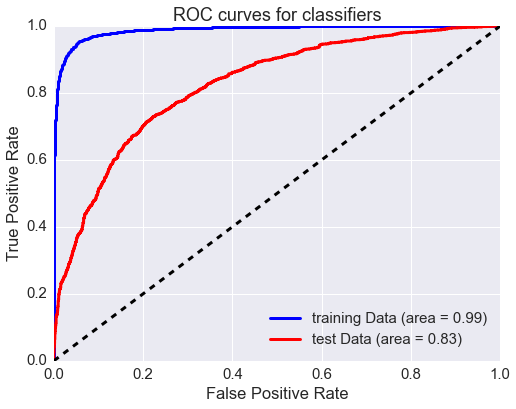

In [475]:
logreg_y_train_prob = best_logreg_model.predict_proba(X_train)
logreg_y_test_prob = best_logreg_model.predict_proba(X_test)

fpr_train, tpr_train, _ = metrics.roc_curve(y_train, logreg_y_train_prob[:,1])
roc_auc_train = metrics.auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = metrics.roc_curve(y_test, logreg_y_test_prob[:,1])
roc_auc_test = metrics.auc(fpr_test, tpr_test)


plt.figure(figsize=(8,6))
plt.plot(fpr_train, tpr_train, color = 'b')
plt.plot(fpr_test, tpr_test, color = 'r')   #m: magenta


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for classifiers')

blue_line = mlines.Line2D([], [], color='blue', label='training Data (area = %0.2f)' % roc_auc_train)
red_line = mlines.Line2D([], [], color='red', label='test Data (area = %0.2f)' % roc_auc_test)

plt.legend(handles=[blue_line, red_line],loc="lower right")


## Random Forest with Grid Search

In [477]:
from time import time
t0 = time()
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print ('ACC:', rf.score(X_test, y_test))
print (time()-t0)

ACC: 0.658425689116
20.319674968719482


In [478]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
parameters = {'n_estimators': [100, 200, 300, 500, 700, 1000],'max_depth':[5,10,15],'min_samples_leaf':[10,20]}
model_cv_grid = grid_search.GridSearchCV(rf,parameters,scoring='roc_auc',verbose=2,n_jobs=-1, cv =10)
model_cv_grid.fit(X_train,y_train)
best_rf_model = model_cv_grid.best_estimator_

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV] n_estimators=100, max_depth=5, min_samples_leaf=10 ..............
[CV] n_estimators=100, max_depth=5, min_samples_leaf=10 ..............
[CV] n_estimators=100, max_depth=5, min_samples_leaf=10 ..............
[CV] n_estimators=100, max_depth=5, min_samples_leaf=10 ..............
[CV] ..... n_estimators=100, max_depth=5, min_samples_leaf=10 -  46.4s[CV] ..... n_estimators=100, max_depth=5, min_samples_leaf=10 -  44.8s[CV] ..... n_estimators=100, max_depth=5, min_samples_leaf=10 -  41.5s[CV] ..... n_estimators=100, max_depth=5, min_samples_leaf=10 -  39.7s



[CV] n_estimators=100, max_depth=5, min_samples_leaf=10 ..............[CV] n_estimators=100, max_depth=5, min_samples_leaf=10 ..............[CV] n_estimators=100, max_depth=5, min_samples_leaf=10 ..............[CV] n_estimators=100, max_depth=5, min_samples_leaf=10 ..............



[CV] ..... n_estimators=100, max_depth=5, min_samples_leaf=10 -  33.1s[CV] ..... n_es

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 10.6min


KeyboardInterrupt: 





[CV] ..... n_estimators=100, max_depth=5, min_samples_leaf=20 -  31.1s[CV] ..... n_estimators=200, max_depth=5, min_samples_leaf=20 -  45.0s[CV] ..... n_estimators=100, max_depth=5, min_samples_leaf=20 -  30.1s[CV] ..... n_estimators=200, max_depth=5, min_samples_leaf=20 -  42.9s



[CV] n_estimators=100, max_depth=5, min_samples_leaf=20 ..............[CV] n_estimators=300, max_depth=5, min_samples_leaf=20 ..............[CV] n_estimators=100, max_depth=5, min_samples_leaf=20 ..............[CV] n_estimators=300, max_depth=5, min_samples_leaf=20 ..............



[CV] ..... n_estimators=100, max_depth=5, min_samples_leaf=20 -  26.4s[CV] ..... n_estimators=300, max_depth=5, min_samples_leaf=20 - 1.1min[CV] ..... n_estimators=100, max_depth=5, min_samples_leaf=20 -  26.0s[CV] ..... n_estimators=300, max_depth=5, min_samples_leaf=20 - 1.1min



[CV] n_estimators=100, max_depth=5, min_samples_leaf=20 ..............[CV] n_estimators=300, max_depth=5, min_samples_leaf=20 ..............[CV]